# Group member: Anqi Chen anqich@seas.upenn.edu and Xuhang Chen xuhangc@seas.upenn.edu

## Q1

In [1]:
import csv
import pandas as pd
import numpy as np

## Firstly, we read csv file using pandas and get a dataframe a. 

In [6]:
a = pd.read_csv('ratings.csv')

In [9]:
user_max = len(a['userId'].unique())
movie_max = len(a['movieId'].unique())

138493

In [11]:
user_max

138493

In [12]:
movie_max

26744

## We create a matrix of size 26744*138493 to hold True False table and put rating > 2.5 to the True False table.

In [14]:
import time
movie = list(sorted(set(a['movieId'].tolist())))
d = {}
i = 0
for x in movie:
    d[x] = i
    i+=1
m = np.zeros(shape = (26744, user_max),dtype=np.bool)
with open('ratings.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter = ',')
    next(reader)
    for row in reader:
        if float(row[2]) > 2.5:
            m[d[int(row[1])], int(row[0]) - 1] = True

In [15]:
m

array([[False, False,  True, ..., False, False,  True],
       [ True, False, False, ..., False, False,  True],
       [False,  True, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

# Q2

In [16]:
import random
import csv
import numpy as np

## Firstly, we create a list, whose length is the number of user. Then, we create set named 'array' for each user which includes movies that they like.

In [17]:
res = []
user_id = user_max
array = []
for x in range(user_id):
    a = []
    array.append(a)
with open('ratings.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter = ',')
    next(reader)
    for row in reader:
        if float(row[2]) > 2.5:
            array[int(row[0]) - 1].append(int(row[1]))

## We calculate similarity between liked movie set of each user using Jaccard formula. 

In [28]:
for x in range(10000) :
    sample = random.sample(range(0, user_id), 2)
    array1 = array[sample[0]]
    array2 = array[sample[1]]
    itersect = len(list(set(array1) & set(array2)))
    union = len(list(set(array1) | set(array2)))
    res.append(float(itersect)/union)
print('mean is ', np.mean(res))
res.sort(reverse=True)
for x in range(10):
    print('number ',x + 1,' element is ', res[x])

mean is  0.0419436850972
number  1  element is  0.5625
number  2  element is  0.53125
number  3  element is  0.5135135135135135
number  4  element is  0.5128205128205128
number  5  element is  0.5
number  6  element is  0.5
number  7  element is  0.5
number  8  element is  0.48717948717948717
number  9  element is  0.47368421052631576
number  10  element is  0.4666666666666667


## We get average similarity to be 0.04277. the 10 largest Jaccard similarity values are shown above.

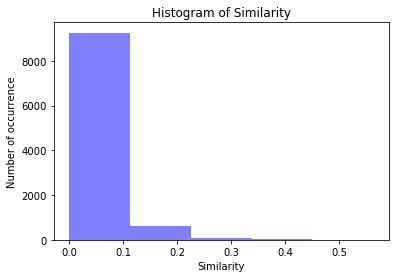

In [29]:
import matplotlib.pyplot as plt

num_bins = 5
plt.xlabel('Similarity')
plt.ylabel('Number of occurrence')
plt.title(r'Histogram of Similarity')
n,bins,patches = plt.hist(res,num_bins,facecolor='blue',alpha=0.5)
plt.show()

# Q3

## We create a list, whose length is the number of user. Then, we create set named 'array' for each user which includes movies that they like.

In [30]:
res = []
user_id = 138493
m = []
for x in range(user_id):
    a = []
    m.append(a)
with open('ratings.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter = ',')
    next(reader)
    for row in reader:
        if float(row[2]) > 2.5:
            m[int(row[0]) - 1].append(int(row[1]))

## We delete users who don't like any movie and record index into L.

In [34]:
L = []
for i in range(len(m)):
    if len(m[i]) == 0:
        L.append(i)

m = np.delete(m, L, 0)

## We delete 48 users in total.

In [35]:
len(m)

138445

# Q4

## Apply hash function to user liked movie list and we get hash_val array which hold hash values. Then we get min_hash, minimum value of hash_val array and store it to each user. And we repeatedly apply 1000 random hash functions to them. We add each minimum hash values to hash_list corresponding to each user. And finally we add each user list to signature matrix. Therefore, we get a signature matrix of size 138445*1000.

In [37]:
import time
import random
t0 = time.time()


def signature_matrix(inputL,randomNum,prime):
    for i in range(len(inputL)):
        inputL[i] = np.asarray(inputL[i])
    sig_matrix = []
    for user in inputL:
        hash_list = []
        for j in range(randomNum):
            rana = random.randint(1, 8241)
            ranb = random.randint(1, 8241)
            hash_val = np.remainder((rana*user+ranb),prime)
            min_hash = np.amin(hash_val)
            hash_list.append(min_hash)
        sig_matrix.append(hash_list)
    return sig_matrix

elapsed = (time.time() - t0)

In [38]:
t0 = time.time()
sig_matrix = signature_matrix(m,1000,8243)
elapsed = (time.time() - t0)

In [39]:
elapsed

1605.630378961563

## In order to do local sensitivity hash, we would find r and b values in order to achieve maximum hitting probability. In order to maximize Pr(hit) = 1-(1-S^r)^b, and at the same time keep r*b = 1000, we found r = 10, b = 100.

In [41]:
sig = np.transpose(sig_matrix)
for i in range(len(sig)):
    sig[i] = np.asarray(sig[i],dtype = np.single)

## Divide signature_matrix into 100 bands. For each band hash each user column, and get sum hash value. Finally, we get a band_matrix.

In [124]:
def hash_band(r,b,prime,signature_matrix):
    band_matrix = []
    for j in range(b):
        band = sig[(j)*r:(j+1)*r]
    #138449#353#2677
        rana = random.randint(1, prime)
        ranb = random.randint(1, prime)
        hash_val = np.remainder((rana*band+ranb),prime)
        sum_hash = np.sum(hash_val, axis=0)
        band_matrix.append(sum_hash)
    return band_matrix

In [156]:
band_matrix = hash_band(10,100,353,sig)

## We create bucket which is dictionary for each band to hold key: movie_id, value: user_id. Since we delete some user_ids, we have a function transform(num) to restore user_id. Since it takes too long to run the whole band_matrix, we choose to iterate one by one band,

In [170]:
def bucket(band_matrix):
    dic = {}
    band = band_matrix
    for k in range(len(band)):
        if band[k] not in dic:
            dic[band[k]] = []
        dic[band[k]].append(k)
    return dic

dic = bucket(band_matrix[0])

## Jaccard similarity function

In [171]:
def sim(array1,array2):
    itersect = len(list(set(array1) & set(array2)))
    union = len(list(set(array1) | set(array2)))
    return float(itersect)/union

In [172]:
import itertools as it
list1 = []
for k,v in dic.items():
    if len(v) >= 2:
        set1 = it.combinations(v,2)
        list1 += set1
print(len(list1))

8296768


In [ ]:
t0 = time.time()
import itertools as it
s = set()
for k,v in dic.items():
    if len(v) >= 2:
        set1 = it.combinations(v,2)
        for elem in set1:
            if sim(m[elem[0]], m[elem[1]]) > 0.65:
                s.add(elem)  
elapsed = (time.time() - t0)

In [131]:
s1 = s
len(s1)

143

In [ ]:
dic = bucket(band_matrix[1])

In [ ]:
import itertools as it
list1 = []
for k,v in dic.items():
    if len(v) >= 2:
        set1 = it.combinations(v,2)
        list1 += set1
print(len(list1))

In [ ]:
t0 = time.time()
import itertools as it
s = set()
for k,v in dic.items():
    if len(v) >= 2:
        set1 = it.combinations(v,2)
        for elem in set1:
            if sim(m[elem[0]], m[elem[1]]) > 0.65:
                s.add(elem)  
elapsed = (time.time() - t0)

In [87]:
s2 = s
len(s2)

130

In [ ]:
dic = bucket(band_matrix[2])

In [ ]:
import itertools as it
list1 = []
for k,v in dic.items():
    if len(v) >= 2:
        set1 = it.combinations(v,2)
        list1 += set1
print(len(list1))

In [ ]:
t0 = time.time()
import itertools as it
s = set()
for k,v in dic.items():
    if len(v) >= 2:
        set1 = it.combinations(v,2)
        for elem in set1:
            if sim(m[elem[0]], m[elem[1]]) > 0.65:
                s.add(elem)  
elapsed = (time.time() - t0)

In [ ]:
s3 = s
len(s3)

## Transform deleted index to original index.

In [121]:
l = [2975,
 5204,
 7097,
 16982,
 18513,
 18812,
 20500,
 20510,
 24529,
 25293,
 29166,
 33382,
 39470,
 40699,
 44173,
 49013,
 54259,
 56199,
 59004,
 59937,
 65364,
 66752,
 67321,
 72822,
 73478,
 74083,
 74275,
 75235,
 75470,
 78513,
 80489,
 81277,
 84563,
 85668,
 87565,
 90246,
 92500,
 98536,
 99444,
 103629,
 106617,
 108028,
 117729,
 119969,
 122283,
 130606,
 131656,
 135470]
def transform(num):
    if num < 2975:
        return num
    elif num >= 135470:
        return num + 48
    else:
        for i in range(len(l) - 1):
            if l[i] <= num < l[i+1]:
                return num + i + 1

In [177]:
l1=[]
for x in s1:
    elem1 = transform(x[0])
    elem2 = transform(x[1])
    l1.append((elem1,elem2))

In [178]:
l1

[(7282, 51389),
 (49987, 60282),
 (28700, 88253),
 (30083, 51389),
 (42230, 74808),
 (53675, 56720),
 (72030, 129065),
 (73336, 88075),
 (37943, 93170),
 (24517, 119381),
 (90265, 130002),
 (8067, 111633),
 (63864, 135076),
 (66987, 130131),
 (27914, 131858),
 (28351, 111633),
 (10887, 98855),
 (58510, 94494),
 (116913, 134907),
 (52590, 105747),
 (77329, 137197),
 (58970, 110759),
 (112814, 130316),
 (70125, 98372),
 (29250, 44790),
 (31699, 138452),
 (4681, 34309),
 (41730, 125196),
 (32384, 45867),
 (6657, 8825),
 (35592, 101569),
 (27325, 62943),
 (7547, 85365),
 (11160, 21559),
 (79771, 110993),
 (4880, 106634),
 (36185, 73905),
 (38863, 63434),
 (97812, 98704),
 (41861, 120288),
 (71537, 80708),
 (27114, 96013),
 (38535, 89958),
 (31699, 46761),
 (112663, 117557),
 (12945, 105572),
 (11975, 134955),
 (8241, 124381),
 (26372, 136839),
 (33037, 63166),
 (51777, 96519),
 (7135, 41730),
 (67547, 113950),
 (65618, 85659),
 (10735, 33331),
 (34750, 77492),
 (19192, 127245),
 (87129, 94

In [175]:
l2=[]
for x in s2:
    elem1 = transform(x[0])
    elem2 = transform(x[1])
    l2.append((elem1,elem2))

In [176]:
l2

[(63945, 106943),
 (84205, 117219),
 (75747, 135820),
 (65397, 127813),
 (67477, 131312),
 (103875, 106286),
 (10266, 83310),
 (36851, 95626),
 (25288, 121024),
 (53192, 73615),
 (77492, 87261),
 (33004, 100818),
 (47896, 49987),
 (8072, 21610),
 (128936, 130573),
 (39683, 130939),
 (24946, 71467),
 (37410, 81637),
 (16826, 108023),
 (27184, 74900),
 (5469, 117467),
 (12047, 66932),
 (52590, 108314),
 (443, 28000),
 (36152, 48785),
 (115255, 124324),
 (101159, 103265),
 (72674, 114130),
 (27764, 135581),
 (7831, 129321),
 (19346, 93135),
 (80462, 93453),
 (62993, 66424),
 (32721, 90320),
 (45867, 96524),
 (46656, 89392),
 (99621, 105326),
 (4531, 42171),
 (34750, 68742),
 (36905, 89388),
 (10243, 32605),
 (74528, 117528),
 (36851, 59677),
 (38390, 85659),
 (7227, 20659),
 (43221, 89388),
 (38863, 59672),
 (70296, 107528),
 (46575, 105437),
 (13966, 118861),
 (104445, 113197),
 (35242, 78114),
 (17250, 100441),
 (12685, 45221),
 (45009, 83451),
 (97332, 105249),
 (50389, 113078),
 (25, 

## l1 and l2 are pairs with similarity >0.65

## Since l1 is of size 143, l2 is of size 130, we estimate the total pair size to be 18,000.

# Q5

## dic is dictionary of each band in band_matrix.

In [ ]:
def findNeighbor(elem, dic):
    values = dic.values()
    if elem not in [x for v in values for x in v if type(v)==list]:
        return None
    a = []
    for key,value in dic.items():
        if elem in value:
            a = value
            break
    a.remove(elem)
    res = []
    for i in a:
        similarity = sim(array(elem),array(a[i]))
        res.append(similarity)
    res.sort(reverse=True)
    return res[0]

